In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [2]:
# 考古題和驗證題分開來
from sklearn.model_selection import train_test_split
# 回傳: [90%題目, 10%題目, 90%答案, 10%答案]
x_train, x_test, y_train, y_test = train_test_split(iris["data"], 
                                                    iris["target"], 
                                                    test_size=0.1)

In [3]:
# 第一步: 做考古題
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3) # k 選 3, 因為有3個species 
clu.fit(x_train) # 不帶標籤y 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
clu.labels_ # 分群的標籤

array([1, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 0,
       0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 2, 0, 1,
       0, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 0, 0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0,
       0, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 2,
       0, 0, 1], dtype=int32)

In [5]:
# 正確率沒有意義：因為標籤不一定一樣

# 第二步: 驗證一下公式好壞
from sklearn.metrics import accuracy_score
pre = clu.predict(x_test)
print("正確率:", accuracy_score(pre, y_test) * 100, "%")

正確率: 6.666666666666667 %


In [6]:
print(pre)
print(y_test)

[0 2 0 2 2 2 0 1 2 1 1 1 1 0 1]
[2 1 2 1 1 2 2 0 1 0 0 0 0 2 0]


The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

https://en.wikipedia.org/wiki/Silhouette_(clustering)


The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. 


- The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [8]:
from sklearn.metrics import silhouette_score
clu = KMeans(n_clusters=2)
clu.fit(iris["data"])

silhouette_score(iris["data"], clu.labels_)

0.6808136202713507

In [9]:
# K = 2 的Silhouette比較高
# Setosa 跟其他兩個完全不同

from sklearn.metrics import silhouette_score
y = []
x = []
for k in range(2, 6):
    clu = KMeans(n_clusters=k)
    clu.fit(iris["data"]) 
    x.append(k)
    y.append(silhouette_score(iris["data"], clu.labels_))
print(x)
print(y)

[2, 3, 4, 5]
[0.6808136202713507, 0.5525919445213676, 0.49782569007544936, 0.4885175508538632]


Text(0.5,1,'Sihouette Score V.S.K')

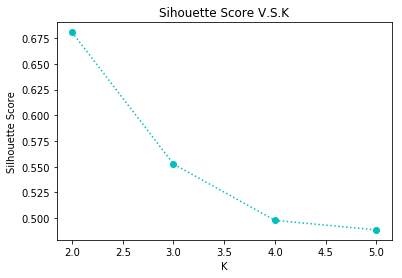

In [16]:
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
# https://www.w3schools.com/cssref/css_websafe_fonts.asp
import matplotlib.pyplot as plt

# jupyter notebook 的magic 指令，只要有這行可以省略所有的plt.show
%matplotlib inline 
plt.plot(x, y, "co:")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Sihouette Score V.S.K")
# plt.show()


# 選擇k = 2 (S 值最高, 但k 太少) or k = 3 (S 值次高) 都是可以被接受的

Text(0.5,1,'Sihouette Score V.S. K')

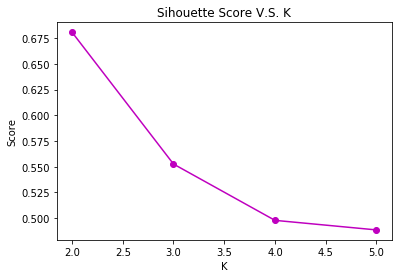

In [14]:
plt.plot(x, y, "mo-")
plt.xlabel("K")
plt.ylabel("Score")
plt.title("Sihouette Score V.S. K")
# plt.show()